In [1]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [2]:
###
from keras.datasets import fashion_mnist

In [3]:
fashion_dict = {0 : "T-shirt/top",
1 : "Trouser",
2 : "Pullover",
3 : "Dress",
4 : "Coat",
5 : "Sandal",
6 : "Shirt",
7 : "Sneaker",
8 : "Bag",
9 : "Ankel boot",
}

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Ankel boot


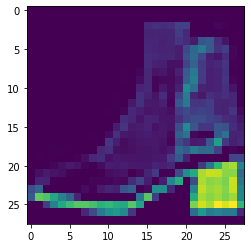

In [6]:
plt.imshow(X_train[0])
print(fashion_dict[y_train[0]])

In [7]:
X_train.shape

(45000, 28, 28)

In [8]:
from keras.layers import Flatten

### X_train --> Flatten --> Dense --> Dense --> Dense --> Dense(output)

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [10]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="sigmoid"),
        Dense(1024,activation="sigmoid"),
        Dense(512,activation="sigmoid"),
        Dense(output_shape,activation="softmax")
    ]
)

In [11]:
for i in range(1,len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])
np.sum(model1.layers[1].get_weights()[0]) == np.sum(model2.layers[1].get_weights()[0])

True

In [12]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [13]:
print("relu", model1.evaluate(X_test,y_test))
print("sigmoid", model2.evaluate(X_test,y_test))

313/313 [==============================] - 5s 14ms/step - loss: 0.3793 - accuracy: 0.8710
relu [0.37931007146835327, 0.8709999918937683]
313/313 [==============================] - 5s 14ms/step - loss: 0.5606 - accuracy: 0.7934
sigmoid [0.5606306791305542, 0.79339998960495]


In [14]:
### 분포 값 변경 (relu)

In [15]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [22]:
model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(516,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation="relu"),
        Dense(1024,activation="relu"),
        Dense(512,activation="relu"),
        Dense(256,activation="relu"),
        Dense(128,activation="relu"),
        Dense(output_shape,activation="softmax")
    ]
)

In [23]:
optimizer = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

model1.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )
model2.fit(X_train,
        y_train,
        epochs=10,
        batch_size=400,
        verbose=0
        )

In [24]:
print("relu1", model1.evaluate(X_test,y_test))
print("relu2", model2.evaluate(X_test,y_test))

313/313 [==============================] - 5s 16ms/step - loss: 0.6802 - accuracy: 0.8075
relu1 [0.6802361011505127, 0.8075000047683716]
313/313 [==============================] - 5s 14ms/step - loss: 0.5321 - accuracy: 0.8337
relu2 [0.532126247882843, 0.8337000012397766]


In [ ]:
model1 = Sequential()
model1.add(Flatten(input_shape = input_shape))
model1.add(Dense(1024,activation="relu"))
model1.add(Dense(1024,activation="relu"))
model1.add(Dense(516,activation="relu"))
model1.add(Dense(output_shape,activation="softmax"))

model2 = Sequential()
model2.add(Flatten(input_shape = input_shape))
model2.add(Dense(1024,activation="relu"))
model2.add(Dense(1024,activation="relu"))
model2.add(Dense(516,activation="relu"))
model2.add(Dense(output_shape,activation="softmax"))


In [ ]:
optimizer = "adam"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss =loss,
            metrics=metrics)

In [ ]:
from datetime import datetime

In [ ]:
model1_s = datetime.now()
model1.fit(X_train,
           y_train,
           epochs=20,
           batch_size=400,
           verbose=0)
model2.fit(X_train,
           y_train,
           epochs=20,
           batch_size=400,
           verbose=0)
print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))

In [ ]:
len(X_train)

In [25]:
from datetime import datetime

In [ ]:
x